### Mengumpulkan Data

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd

In [3]:
#Reading the data file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PDS/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.shape

(103904, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

1. Kolom Arrival Delay In minutes mempunyai 310 missing values
2. Kolom Unnamed dan id tidak berefek pada pemodelan klasifikai
3. Banyak kolom yang bertipe kategorikal namun masih dalam tipe object atau int64

In [6]:
df = df.drop(df.iloc[:,[0, 1]], axis = 1)

In [7]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
df.iloc[:,categorical_indexes] = df.iloc[:,categorical_indexes].astype('category')

<ipython-input-7-0a961f6ba941>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,categorical_indexes] = df.iloc[:,categorical_indexes].astype('category')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

In [9]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [10]:
# Isi missing values dengan median pada kolom arrival delay in minutes
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [11]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [12]:
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>],
       [<Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 'Arrival Delay in Minutes'}>]],
      dtype=object)

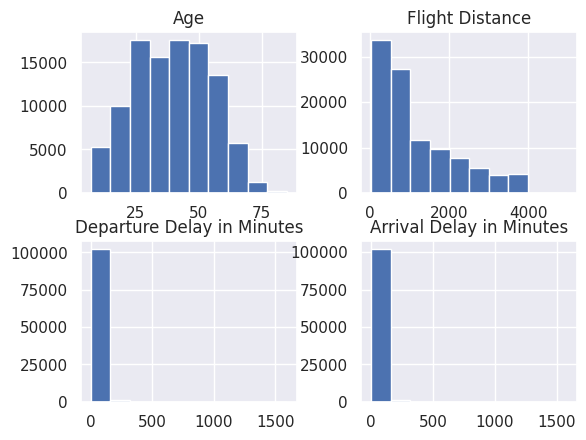

In [14]:
df.hist()

In [15]:
df['Flight Distance'] = np.log1p(df['Flight Distance'])
# df['Departure Delay in Minutes'] = np.log1p(df['Departure Delay in Minutes'])
# df['Arrival Delay in Minutes'] = np.log1p(df['Arrival Delay in Minutes'])

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>],
       [<Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 'Arrival Delay in Minutes'}>]],
      dtype=object)

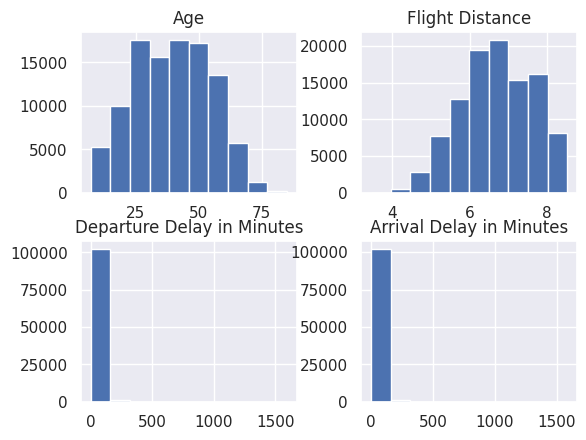

In [16]:
df.hist()

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [18]:
scaler = StandardScaler()
norm_cols = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']
df[norm_cols] = scaler.fit_transform(df[norm_cols])

df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,6.133398,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0.266393,0.074169,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,5.463832,3,2,3,3,1,3,1,1,1,5,3,1,4,1,-0.361375,-0.236313,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,7.041412,2,2,2,2,5,5,5,5,4,3,4,4,4,5,-0.387532,-0.391554,satisfied
3,Female,Loyal Customer,25,Business travel,Business,6.333280,2,5,5,5,2,2,2,2,2,5,3,1,4,2,-0.099805,-0.158692,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,5.370638,3,3,3,3,4,5,5,3,3,4,4,3,3,3,-0.387532,-0.391554,satisfied


In [22]:
df['Gender'].value_counts(), df['Customer Type'].value_counts(), df['Type of Travel'].value_counts(), df['Class'].value_counts()

(Female    52727
 Male      51177
 Name: Gender, dtype: int64,
 Loyal Customer       84923
 disloyal Customer    18981
 Name: Customer Type, dtype: int64,
 Business travel    71655
 Personal Travel    32249
 Name: Type of Travel, dtype: int64,
 Business    49665
 Eco         46745
 Eco Plus     7494
 Name: Class, dtype: int64)

In [20]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [19]:
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
df['Class'] = df['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})


### Modelling

In [ ]:
X = df.drop('satisfaction', axis = 1)
y = df.satisfaction

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Memisahkan data menjadi data pelatihan (80%) dan data pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
k = KFold(n_splits = 5)
score = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = k).mean()
print("Accuracy on the training set:", round(score, 3))

Accuracy on the training set: 0.909


In [ ]:
accuracy = []
for i in range(1,15):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(y_test, pred_i)
    accuracy.append(accuracy_i)

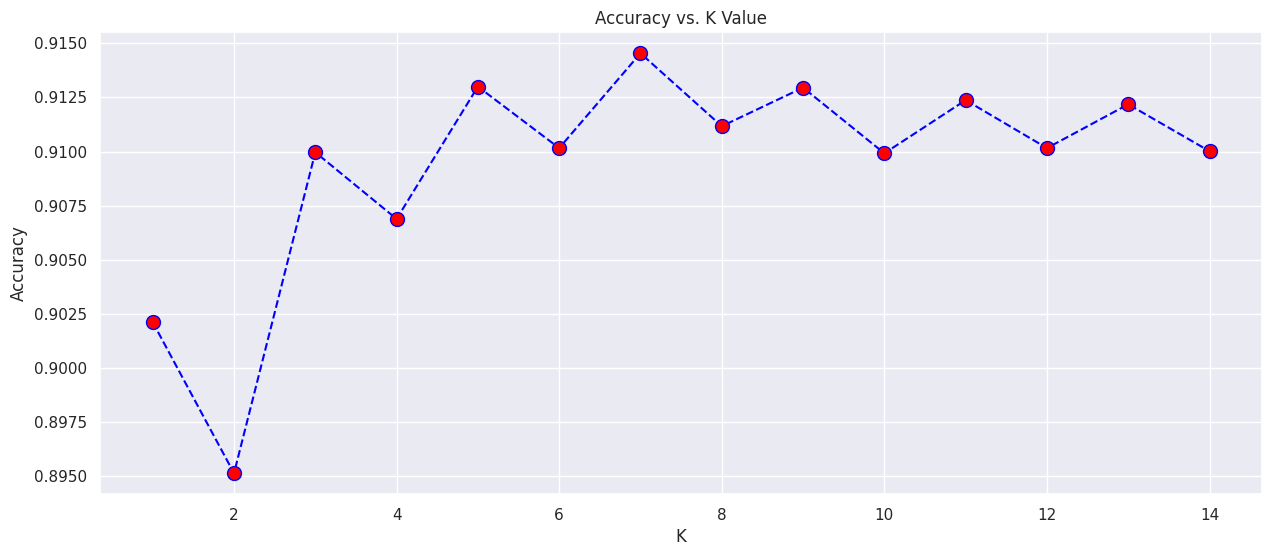

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

Accuracy: 91.45%


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print("\nTraining set score: {:.2f}".format(knn.score(X_train, y_train)))
print("\nTest set score: {:.2f}".format(knn.score(X_test, y_test)))
print("\nAccuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred)))
print("\nConfusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("\nClassification_Report: \n",classification_report(y_test,y_pred))


Training set score: 0.93

Test set score: 0.91

Accuracy Score: 0.91

Confusion Matrix: 
 [[11166   547]
 [ 1229  7839]]

Classification_Report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93     11713
           1       0.93      0.86      0.90      9068

    accuracy                           0.91     20781
   macro avg       0.92      0.91      0.91     20781
weighted avg       0.92      0.91      0.91     20781



### Save Model

In [ ]:
import pickle

In [ ]:
filename = 'model_knn.sav'
pickle.dump(knn, open(filename, 'wb'))